# Lab Two: Your first 21cm Line Measurement
#### We'll measure the 21cm line twice. For the first, the goal is to master the technical aspects and familiarize ourselves with the system and procedures, so instead of worrying about where to point the horn we'll just take whatever position happens to be overhead. For the second, we'll manuall point the horn to a designated position and make a calibrated profile to compare with a well-established profile measurement.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ugradio

## 6.2 Your Measurement
# 1.
Set the system up to observe. Point the horn to the zenith to reduce interference and thermal noise. We use a low pass filter with a cut off frequency of 2 MHz to eliminate aliasing, sample the complex signal, and Fourier transform to calculate the power spectrum. We take many power spectra and average them to reduce noise.

Take some data. How fast must you sample?

We need 2MHz, and Nyquist says we should sample at least twice as much if not more. Say we want 8MHz to be safe. 62.5/8 = 7.8.

#### Take 10 samples and average them
data = []
for i in range(10):
    
    test = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000) #Sdual_mode:sample from A and B ports if True
    data.append(test)

avg = sum(data) / len(data)

np.savetxt('lab2_avg_sampledata_2.18',avg)
np.savetxt('lab2_single_sampledata_2.18', data[0])

In [50]:
avg = np.loadtxt('lab2_avg_sampledata_2.18')
data_0 = np.loadtxt('lab2_single_sampledata_2.18')

# 2. 
Look at the range of sample values by plotting a bunch of them. Best is to make a histogram. The sampled numbers should cover plenty of of bits, quantization should only be barely, or not at all, evident in the histogram. The histogram shape should be a well known function. Which function? Does it?

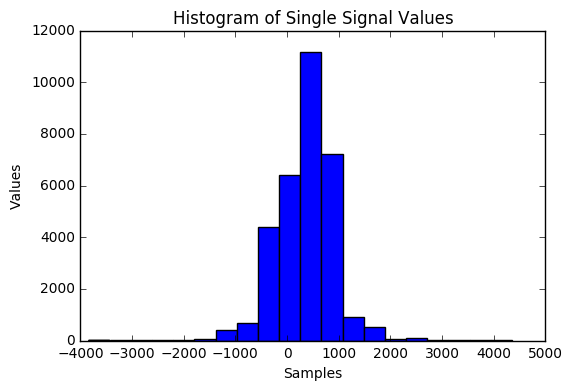

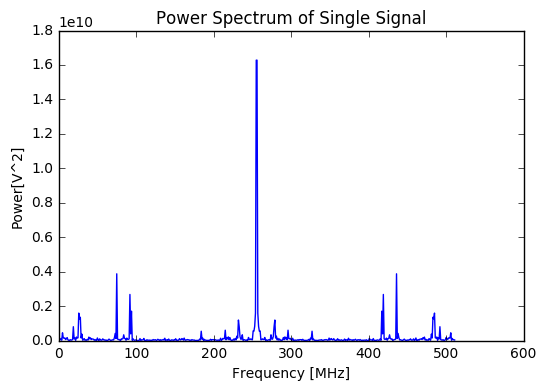

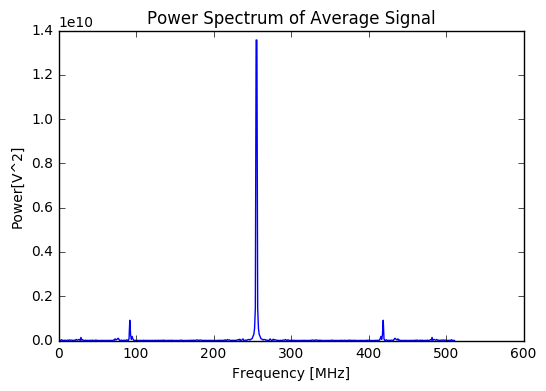

In [51]:
#Plot the signals

#Histogram
plt.hist(data_0, bins = 20)
plt.title("Histogram of Single Signal Values")
plt.xlabel("Samples")
plt.ylabel("Values")
plt.show()

#Single signal
plt.plot(pwerSpec(data_0)[0])
plt.title("Power Spectrum of Single Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.legend()
plt.show()

#Average Signal
plt.plot(pwerSpec(avg)[0])
plt.title("Power Spectrum of Average Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.legend()
plt.show()

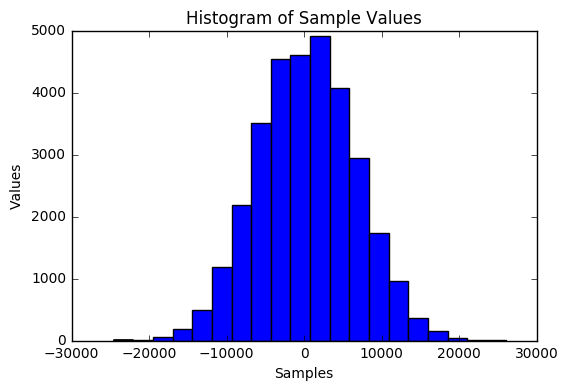

In [177]:
plt.hist(test, bins = 20)
plt.title("Histogram of Sample Values")
plt.xlabel("Samples")
plt.ylabel("Values")
plt.show()

In [46]:
def pwerSpec(filename):
    
    Vsamp = 62.5/8 #MHz
    
    #testFile = np.loadtxt(filename)
    
    N = 512

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    #Fourier voltage spectrum - have real and imaginary parts
    # frequency domain signal
    '''The output is a function of frequency, so you have to specify 
    the frequencies for which you want the output. Suggested: make the 
    frequency increment equal to Vsamp/N over a total range of just under
    Vsamp. Thus, you calculate a voltage spectrum running from -Vsamp/2 to
    not quite Vsamp/2.'''
    
    f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N)
    
    f,fx = ugradio.dft.dft(filename[:N],t=time, f = f_input, vsamp=Vsamp)
    
    # Fourier power spectrum
    '''Power is proportional to voltage squared.
    We want the sum of the squares of the real and imaginary parts.'''
    
    Pow = np.abs(fx)**2
    
    
    return Pow, f